In [1]:
library(BBmisc)
library(SingleCellExperiment)
library(scater)
library(scran)
library(edgeR)


Attaching package: ‘BBmisc’


The following object is masked from ‘package:base’:

    isFALSE


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowM

In [2]:
counts_matrix <- read.csv("~/Google Drive File Stream/My Drive/Projects/RDN-WDP/contrib/scRNAseq/EyeAntennal_Combined_DG2_v4.csv", row.names = 1)
counts_matrix <- t(as.matrix(counts_matrix))
sce <- SingleCellExperiment(assays = list(counts = counts_matrix))

In [3]:
sce <- logNormCounts(sce)

In [4]:
dec <- modelGeneVar(sce)
hvg <- getTopHVGs(dec, prop=0.5)

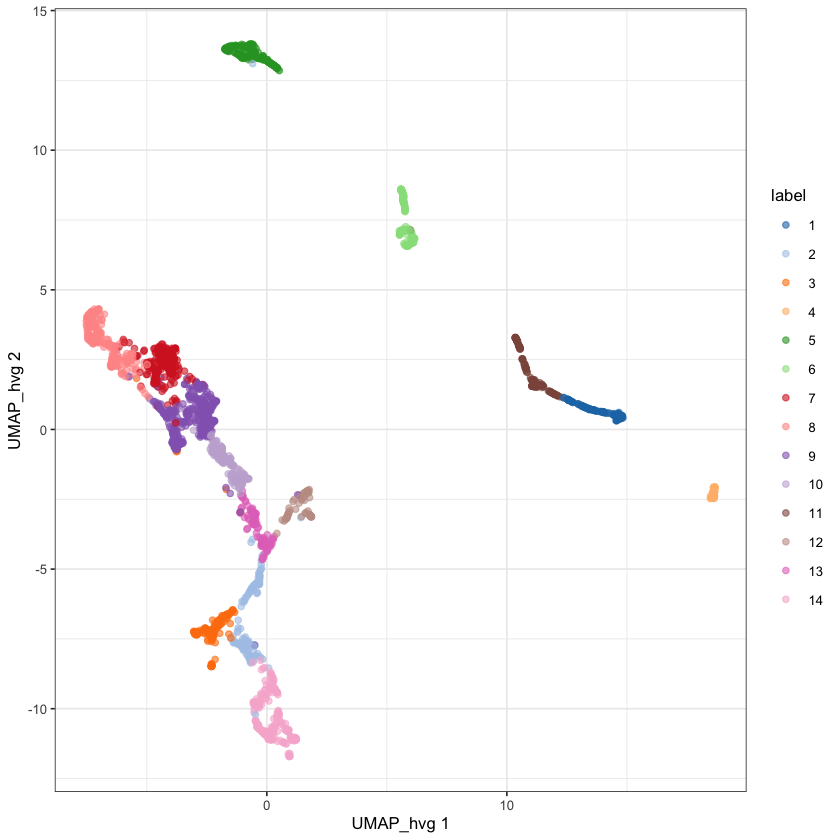

In [5]:
# Dimensionality reduction.
set.seed(1234)
sce <- runPCA(sce, ncomponents=30, subset_row=hvg, name = "PCA_hvg")
sce <- runUMAP(sce, dimred = 'PCA_hvg', external_neighbors=TRUE, name = "UMAP_hvg")
sce <- runTSNE(sce, dimred = 'PCA_hvg', name = "TSNE_hvg")

# Clustering.
g <- buildSNNGraph(sce, use.dimred = 'PCA_hvg')
sce$label <- factor(igraph::cluster_louvain(g)$membership)

# Visualization.
plotReducedDim(sce, 'UMAP_hvg', colour_by="label")

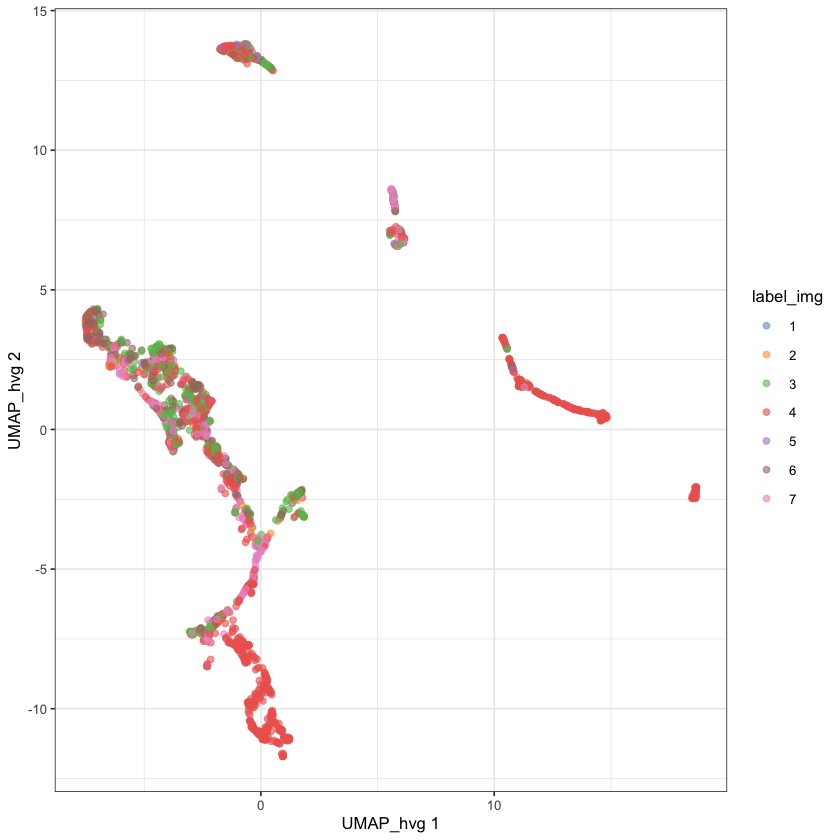

In [6]:
img_labels <- itostr(read.csv("aerts_clusters.csv", row.names=1)$Cluster)
sce$label_img <- img_labels
plotReducedDim(sce, 'UMAP_hvg', colour_by="label_img")

In [7]:
mfg <- c('Abl', 'Brd', 'CG13928', 'CG15097', 'dila', 'CG17378', 'CG17724', 'CG2556', 'CG30343', 'CG31176', 'CG32150',
         'Lrch', 'rau', 'CG9801', 'DAAM', 'Fas2', 'E.spl.mdelta.HLH', 'SRPK', 'Victoria', 'vn', 'ato', 'beat.IIIc',
         'betaTub60D', 'dap', 'dpr9', 'ktub', 'lola', 'nSyb', 'nmo', 'nvy', 'phyl', 'sNPF', 'sca', 'scrt', 'sens',
         'seq', 'siz', 'spdo')
mfg

[1] "Abl"              "Brd"              "CG13928"          "CG15097"         
 [5] "dila"             "CG17378"          "CG17724"          "CG2556"          
 [9] "CG30343"          "CG31176"          "CG32150"          "Lrch"            
[13] "rau"              "CG9801"           "DAAM"             "Fas2"            
[17] "E.spl.mdelta.HLH" "SRPK"             "Victoria"         "vn"              
[21] "ato"              "beat.IIIc"        "betaTub60D"       "dap"             
[25] "dpr9"             "ktub"             "lola"             "nSyb"            
[29] "nmo"              "nvy"              "phyl"             "sNPF"            
[33] "sca"              "scrt"             "sens"             "seq"             
[37] "siz"              "spdo"

Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“You're computing too large a percentage of total singular values, use a standard svd instead.”


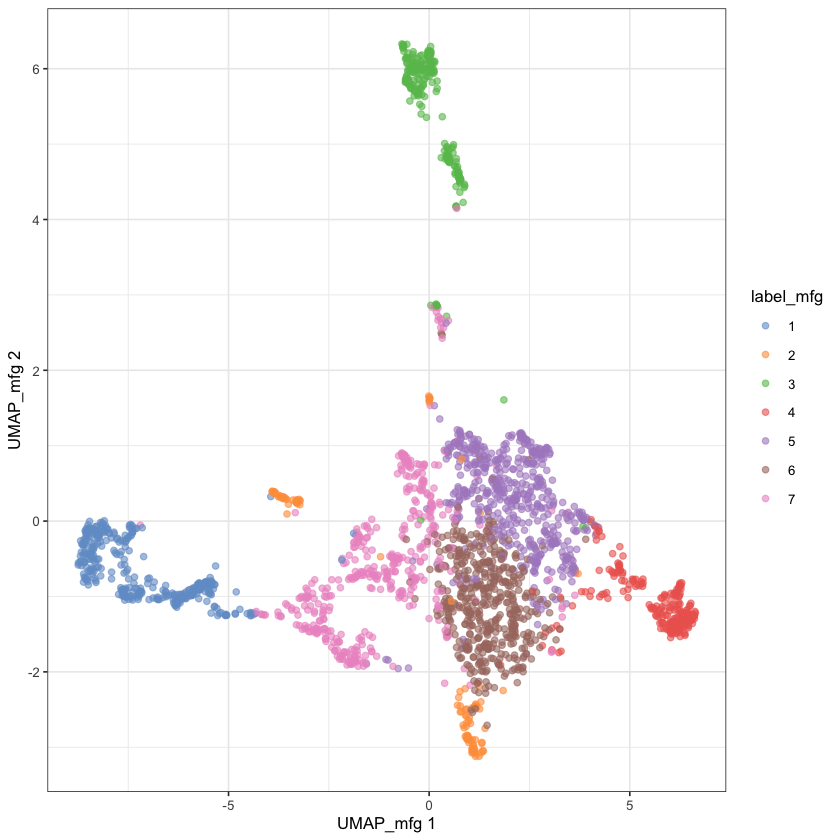

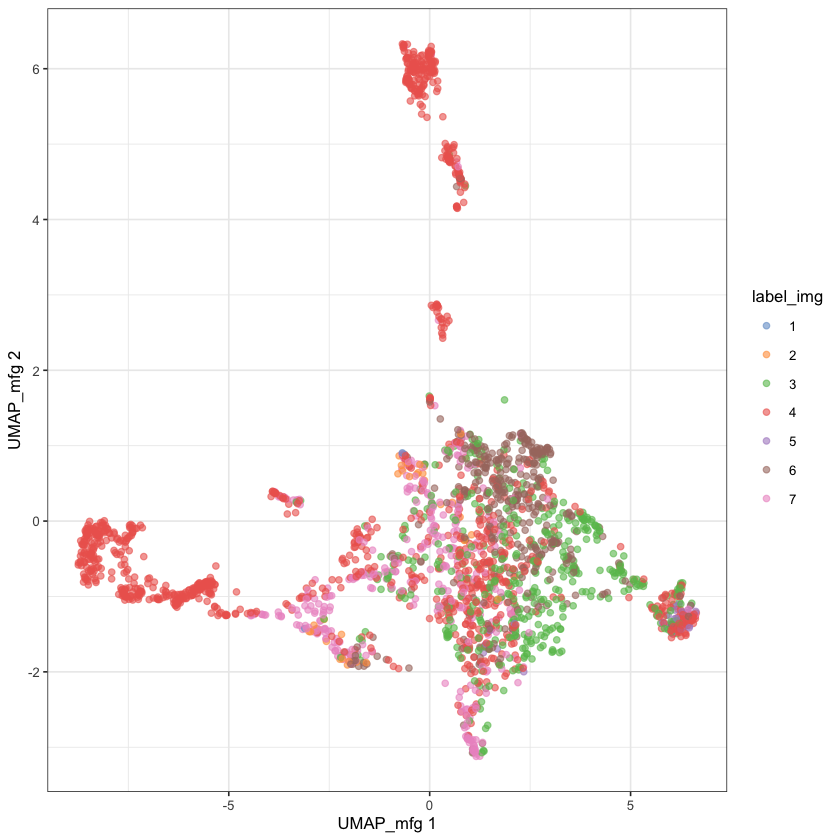

In [8]:
sce <- runPCA(sce, ncomponents=30, subset_row=mfg, name = 'PCA_mfg')
sce <- runUMAP(sce, dimred = 'PCA_mfg', external_neighbors=TRUE, name = 'UMAP_mfg')
sce <- runTSNE(sce, dimred = 'PCA_mfg', name = "TSNE_mfg")

# Clustering.
g <- buildSNNGraph(sce, use.dimred = 'PCA_mfg')
sce$label_mfg <- factor(igraph::cluster_louvain(g)$membership)

# Visualization.
plotReducedDim(sce, 'UMAP_mfg', colour_by="label_mfg")
plotReducedDim(sce, 'UMAP_mfg', colour_by="label_img")

In [9]:
sce

class: SingleCellExperiment 
dim: 11010 2382 
metadata(0):
assays(2): counts logcounts
rownames(11010): X128up X14.3.3epsilon ... zuc zyd
rowData names(0):
colnames(2382): 0 1 ... 2380 2381
colData names(4): sizeFactor label label_img label_mfg
reducedDimNames(6): PCA_hvg UMAP_hvg ... UMAP_mfg TSNE_mfg
altExpNames(0):